C:\Users\KRISHNENDU\anaconda3\envs\etl-pipeline\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


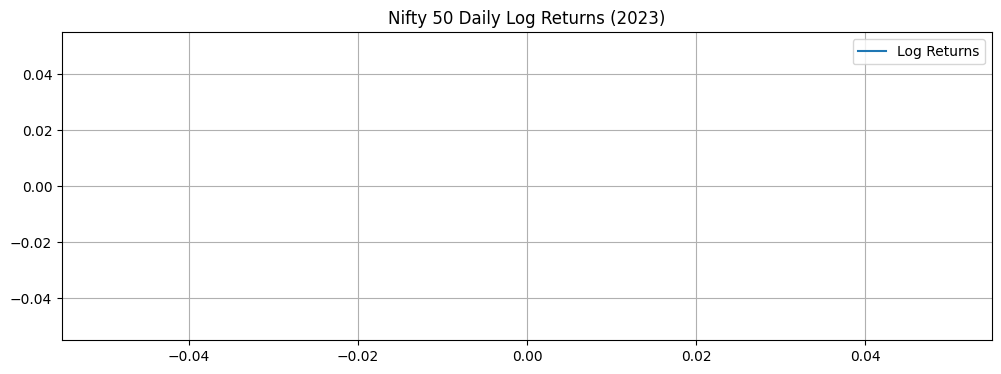

In [1]:
from nsepy import get_history
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf

# Fetch Nifty 50 daily data
data = get_history(symbol="NIFTY",
                   index=True,
                   start=date(2023,1,1),
                   end=date(2023,12,31))

data['log_ret'] = np.log(data['Close'] / data['Close'].shift(1))
data.dropna(inplace=True)

# Plot returns
plt.figure(figsize=(12, 4))
plt.plot(data['log_ret'], label='Log Returns')
plt.title("Nifty 50 Daily Log Returns (2023)")
plt.legend()
plt.grid()
plt.show()


In [2]:
result = adfuller(data['log_ret'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("✅ Stationary" if result[1] < 0.05 else "❌ Not Stationary")

acf_vals = acf(data['log_ret'], nlags=20)

plt.figure(figsize=(10, 4))
plt.stem(range(len(acf_vals)), acf_vals, use_line_collection=True)
plt.title("Autocorrelation of Nifty 50 Log Returns")
plt.xlabel("Lag (days)")
plt.ylabel("ACF")
plt.grid()
plt.show()


ValueError: zero-size array to reduction operation maximum which has no identity